# Virat kohli test analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
virat_test=pd.read_csv('kohli-centuries-test.csv')

In [3]:
virat_test.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Unnamed: 7,Opposition,Ground,Start Date
0,4,15,19,-,-,2,0,NaN,v West Indies,Kingston,20-Jun-11
1,0,27,27,-,-,2,0,NaN,v West Indies,Bridgetown,28-Jun-11
2,30,DNB,30,-,-,1,0,NaN,v West Indies,Roseau,6-Jul-11
3,52,63,115,0,9,2,0,NaN,v West Indies,Mumbai,22-Nov-11
4,11,0,11,-,-,2,0,NaN,v Australia,Melbourne,26-Dec-11


## data preprocessing

In [5]:
virat_test=virat_test.drop(['Unnamed: 7'],axis=1)

In [6]:
virat_test.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Opposition,Ground,Start Date
0,4,15,19,-,-,2,0,v West Indies,Kingston,20-Jun-11
1,0,27,27,-,-,2,0,v West Indies,Bridgetown,28-Jun-11
2,30,DNB,30,-,-,1,0,v West Indies,Roseau,6-Jul-11
3,52,63,115,0,9,2,0,v West Indies,Mumbai,22-Nov-11
4,11,0,11,-,-,2,0,v Australia,Melbourne,26-Dec-11


In [7]:
virat_test.shape

(69, 10)

In [8]:
virat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bat1        69 non-null     object
 1   Bat2        69 non-null     object
 2   Runs        69 non-null     object
 3   Wkts        69 non-null     object
 4   Conc        69 non-null     object
 5   Ct          69 non-null     int64 
 6   St          69 non-null     int64 
 7   Opposition  69 non-null     object
 8   Ground      69 non-null     object
 9   Start Date  69 non-null     object
dtypes: int64(2), object(8)
memory usage: 5.5+ KB


In [9]:
virat_test.isnull().sum()

Bat1          0
Bat2          0
Runs          0
Wkts          0
Conc          0
Ct            0
St            0
Opposition    0
Ground        0
Start Date    0
dtype: int64

In [10]:
virat_test.columns

Index(['Bat1', 'Bat2', 'Runs', 'Wkts', 'Conc', 'Ct', 'St', 'Opposition',
       'Ground', 'Start Date'],
      dtype='object')

In [11]:
virat_test['Year']=pd.DatetimeIndex(virat_test['Start Date']).year

In [17]:
virat_test.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Opposition,Ground,Start Date,Year
0,4,15,19,-,-,2,0,v West Indies,Kingston,20-Jun-11,2011
1,0,27,27,-,-,2,0,v West Indies,Bridgetown,28-Jun-11,2011
2,30,DNB,30,-,-,1,0,v West Indies,Roseau,6-Jul-11,2011
3,52,63,115,0,9,2,0,v West Indies,Mumbai,22-Nov-11,2011
4,11,0,11,-,-,2,0,v Australia,Melbourne,26-Dec-11,2011


In [21]:
virat_test['Opposition']=virat_test['Opposition'].str.replace('v ',"")


In [22]:
virat_test.head()

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Opposition,Ground,Start Date,Year
0,4,15,19,-,-,2,0,West Indies,Kingston,20-Jun-11,2011
1,0,27,27,-,-,2,0,West Indies,Bridgetown,28-Jun-11,2011
2,30,DNB,30,-,-,1,0,West Indies,Roseau,6-Jul-11,2011
3,52,63,115,0,9,2,0,West Indies,Mumbai,22-Nov-11,2011
4,11,0,11,-,-,2,0,Australia,Melbourne,26-Dec-11,2011


In [23]:
virat_test['Bat1'].unique()

array(['4', '0', '30', '52', '11', '23', '44', '116', '58', '103', '19',
       '6', '107', '34', '67*', '1', '3', '57', '119', '46', '38', '25',
       '39', '115', '169', '147', '14', '78', '18', 'DNB', '22', '200',
       'TDNB', '9', '211', '40', '167', '62', '235', '15', '204', '12',
       '13', '42', '213', '243', '5', '153', '54', '149', '97'],
      dtype=object)

In [28]:
#replacing DNB ,TDNB,TO
virat_test['Bat1']=virat_test['Bat1'].str.replace('DNB',"0")
virat_test['Bat1']=virat_test['Bat1'].str.replace('TDNB',"0")
virat_test['Bat1']=virat_test['Bat1'].str.replace('T0',"0")
virat_test['Bat1']=virat_test['Bat1'].str.replace('*',"")

C:\Users\UMMER\AppData\Local\Temp\ipykernel_100524\3189866005.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  virat_test['Bat1']=virat_test['Bat1'].str.replace('*',"")


In [29]:
virat_test['Bat1'].unique()

array(['4', '0', '30', '52', '11', '23', '44', '116', '58', '103', '19',
       '6', '107', '34', '67', '1', '3', '57', '119', '46', '38', '25',
       '39', '115', '169', '147', '14', '78', '18', '22', '200', '9',
       '211', '40', '167', '62', '235', '15', '204', '12', '13', '42',
       '213', '243', '5', '153', '54', '149', '97'], dtype=object)

In [30]:
virat_test['Bat2'].unique()

array(['15', '27', 'DNB', '63', '0', '9', '75', '22', '-', '51*', '14*',
       '7', '20', '34', '41', '96', '11', '67', '105*', '8', '28', '141',
       '1', '54', '46', '3', '10', '21', '29', '16', '88', '4', '18',
       '45', '17', '49*', '81', '6*', '38', '13', '103*', '104*', '50',
       '5', '51', '103'], dtype=object)

In [31]:
virat_test['Bat2']=virat_test['Bat2'].str.replace('DNB',"0")
virat_test['Bat2']=virat_test['Bat2'].str.replace('-',"0")
virat_test['Bat2']=virat_test['Bat2'].str.replace('*',"")

C:\Users\UMMER\AppData\Local\Temp\ipykernel_100524\1470647014.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  virat_test['Bat2']=virat_test['Bat2'].str.replace('*',"")


In [32]:
virat_test['Bat2'].unique()

array(['15', '27', '0', '63', '9', '75', '22', '51', '14', '7', '20',
       '34', '41', '96', '11', '67', '105', '8', '28', '141', '1', '54',
       '46', '3', '10', '21', '29', '16', '88', '4', '18', '45', '17',
       '49', '81', '6', '38', '13', '103', '104', '50', '5'], dtype=object)

In [35]:
virat_test['Conc'].unique()

array(['-', '9', '23', '3', '18', '4', '13', '0', '5', '1'], dtype=object)

In [39]:
virat_test['Conc']=virat_test['Conc'].str.replace('-',"0")

In [40]:
virat_test.Conc=pd.to_numeric(virat_test.Conc)


In [41]:
virat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bat1        69 non-null     object
 1   Bat2        69 non-null     object
 2   Runs        69 non-null     object
 3   Wkts        69 non-null     object
 4   Conc        69 non-null     int64 
 5   Ct          69 non-null     int64 
 6   St          69 non-null     int64 
 7   Opposition  69 non-null     object
 8   Ground      69 non-null     object
 9   Start Date  69 non-null     object
 10  Year        69 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ KB


In [48]:
virat_test['Runs'].unique()

array(['19', '27', '30', '115', '11', '32', '119', '138', '58', '154',
       '33', '26', '103', '107', '34', '101', '42', '3', '57', '215',
       '71', '143', '9', '25', '67', '7', '256', '20', '223', '193', '14',
       '106', '88', '39', '-', '38', '132', '200', '44', '54', '228',
       '89', '248', '68', '235', '15', '242', '13', '6', '104', '213',
       '293', '158', '95', '40'], dtype=object)

In [49]:
virat_test['Runs']=virat_test['Runs'].str.replace('-',"0")

In [51]:
virat_test.Runs=pd.to_numeric(virat_test.Runs)

In [52]:
virat_test['Runs'].unique()

array([ 19,  27,  30, 115,  11,  32, 119, 138,  58, 154,  33,  26, 103,
       107,  34, 101,  42,   3,  57, 215,  71, 143,   9,  25,  67,   7,
       256,  20, 223, 193,  14, 106,  88,  39,   0,  38, 132, 200,  44,
        54, 228,  89, 248,  68, 235,  15, 242,  13,   6, 104, 213, 293,
       158,  95,  40], dtype=int64)

In [55]:
virat_test.Bat1=pd.to_numeric(virat_test.Bat1)
virat_test.Bat2=pd.to_numeric(virat_test.Bat2)

In [56]:
virat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bat1        69 non-null     int64 
 1   Bat2        69 non-null     int64 
 2   Runs        69 non-null     int64 
 3   Wkts        69 non-null     object
 4   Conc        69 non-null     int64 
 5   Ct          69 non-null     int64 
 6   St          69 non-null     int64 
 7   Opposition  69 non-null     object
 8   Ground      69 non-null     object
 9   Start Date  69 non-null     object
 10  Year        69 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 6.1+ KB


In [ ]:
Q:Ttal runs scored?

In [54]:
totruns=virat_test.Runs.sum()
totruns

5994

In [63]:
innings1=virat_test.Bat1.sum()
innings2=virat_test.Bat2.sum()
print(innings1,innings2)

4077 1917


<function matplotlib.pyplot.show(close=None, block=None)>

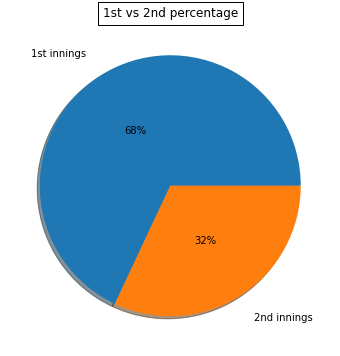

In [71]:
#pie chart for showing percentage of 1st and 2nd innings
slices=[virat_test['Bat1'].sum(),virat_test['Bat2'].sum()]
labels=['1st innings','2nd innings']
plt.pie(slices,labels=labels,autopct='%1.0f%%',pctdistance=.5,labeldistance=1.2,shadow=True)
fig=plt.gcf()
plt.title("1st vs 2nd percentage",bbox={'facecolor':"1",'pad':5})
fig.set_size_inches(6,6)
plt.show

In [ ]:
Q:count of 1st innings and 2nd innings centuries?
    

In [75]:
count1=virat_test[virat_test['Bat1']>100].shape[0]
count2=virat_test[virat_test['Bat2']>100].shape[0]
print(count1,count2)

18 5


In [76]:
total=count1+count2
total

23

In [ ]:
Q:print total runs scored against England?

In [72]:
virat_test['Opposition'].unique()

array(['West Indies', 'Australia', 'New Zealand', 'England',
       'South Africa', 'Bangladesh', 'Sri Lanka'], dtype=object)

In [73]:
virat_test[virat_test['Opposition']=='England'].Runs.sum()

1417

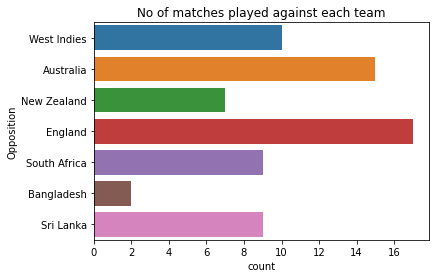

<Figure size 1440x1152 with 0 Axes>

In [77]:
sns.countplot(y=virat_test['Opposition'])
plt.title('No of matches played against each team')
plt.figure(figsize=(20,16))
plt.show()

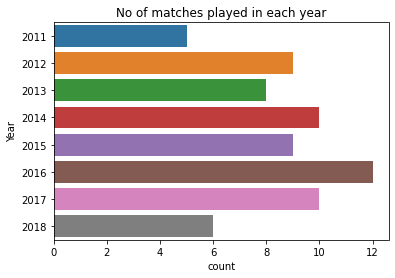

<Figure size 720x1152 with 0 Axes>

In [79]:
sns.countplot(y=virat_test['Year'])
plt.title('No of matches played in each year')
plt.figure(figsize=(10,16))
plt.show()

<AxesSubplot:title={'center':'runs scored against each team'}, xlabel='Opposition'>

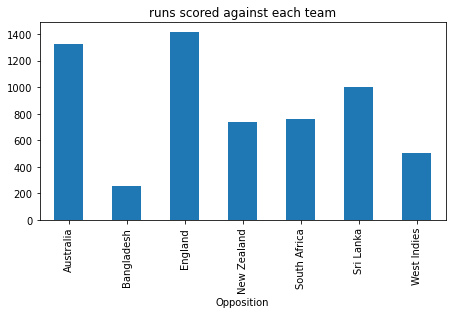

In [80]:
fig=plt.figure(figsize=(16,8))
fig.add_subplot(221)
virat_test.groupby('Opposition').Runs.sum().plot(kind='bar',title='runs scored against each team')

<AxesSubplot:title={'center':'runs scored in each year'}, xlabel='Year'>

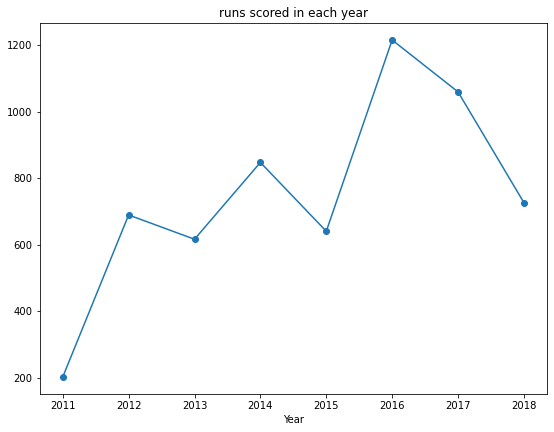

In [81]:
fig=plt.figure(figsize=(20,15))
fig.add_subplot(221)
virat_test.groupby('Year').Runs.sum().plot(marker='o',title='runs scored in each year')

<AxesSubplot:title={'center':'runs scored against each venue'}, xlabel='Ground'>

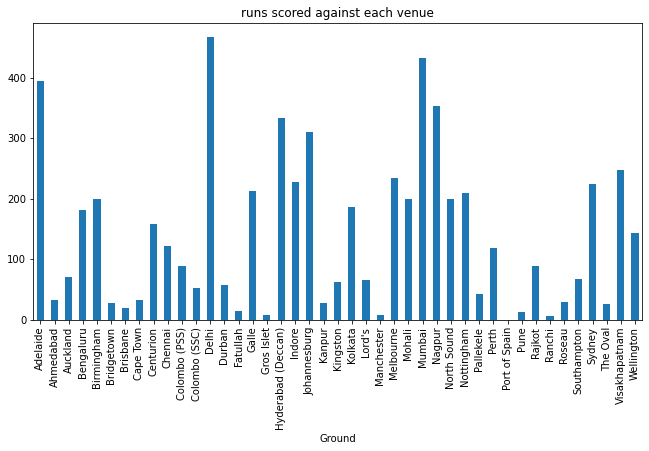

In [82]:
fig=plt.figure(figsize=(24,12))
fig.add_subplot(221)
virat_test.groupby('Ground').Runs.sum().plot(kind='bar',title='runs scored against each venue')

<AxesSubplot:title={'center':'centuries in innings1'}, xlabel='Opposition'>

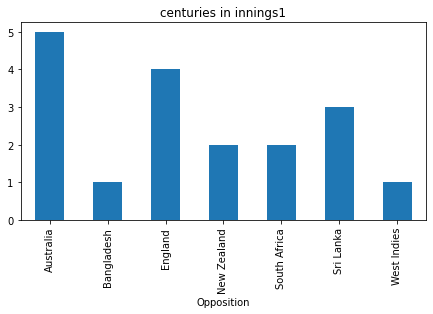

In [88]:
inn1=virat_test['Bat1']>100
data1=virat_test[inn1]
fig=plt.figure(figsize=(16,8))
fig.add_subplot(221)
data1.groupby('Opposition').Bat1.count().plot(kind='bar',title='centuries in innings1')

<AxesSubplot:title={'center':'centuries in innings2'}, xlabel='Opposition'>

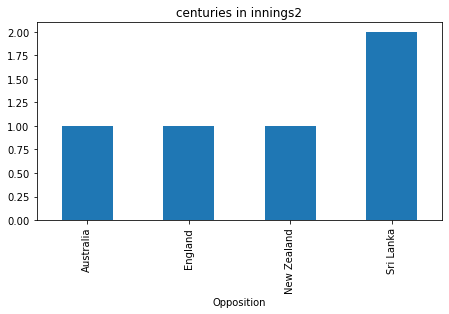

In [89]:
inn2=virat_test['Bat2']>100
data2=virat_test[inn2]
fig=plt.figure(figsize=(16,8))
fig.add_subplot(221)
data2.groupby('Opposition').Bat2.count().plot(kind='bar',title='centuries in innings2')

In [90]:
#checking double centuries
inn1=virat_test['Bat1']>=200
virat_test[inn1]

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Opposition,Ground,Start Date,Year
41,200,0,200,-,0,2,0,West Indies,North Sound,21-Jul-16,2016
47,211,17,228,-,0,2,0,New Zealand,Indore,8-Oct-16,2016
51,235,0,235,-,0,2,0,England,Mumbai,8-Dec-16,2016
53,204,38,242,-,0,1,0,Bangladesh,Hyderabad (Deccan),9-Feb-17,2017
61,213,0,213,-,0,1,0,Sri Lanka,Nagpur,24-Nov-17,2017
62,243,50,293,0,1,0,0,Sri Lanka,Delhi,2-Dec-17,2017


In [91]:
print('no of double centuries in 1st innings')
virat_test[inn1].shape[0]

no of double centuries in 1st innings


6

In [93]:
inn2=virat_test['Bat2']>=200
virat_test[inn2]

,Bat1,Bat2,Runs,Wkts,Conc,Ct,St,Opposition,Ground,Start Date,Year


In [94]:
print('no of double centuries in 2nd innings')
virat_test[inn2].shape[0]

no of double centuries in 2nd innings


0

In [83]:
print('total venues played:',virat_test['Ground'].nunique())

total venues played: 43


In [ ]:
Q:how many runs kohli concived?

In [46]:
conrun=virat_test.Conc.sum()
conrun

76

In [ ]:
Q:how many catches virat took?

In [34]:
catches=virat_test['Ct'].sum()
catches

65

Q:finding how many times virat got out in 0?

In [19]:
print('no of tmes got out 0:')
((virat_test.Bat1=='0')|(virat_test.Bat2=='0')).sum() 

no of tmes got out 0:


6